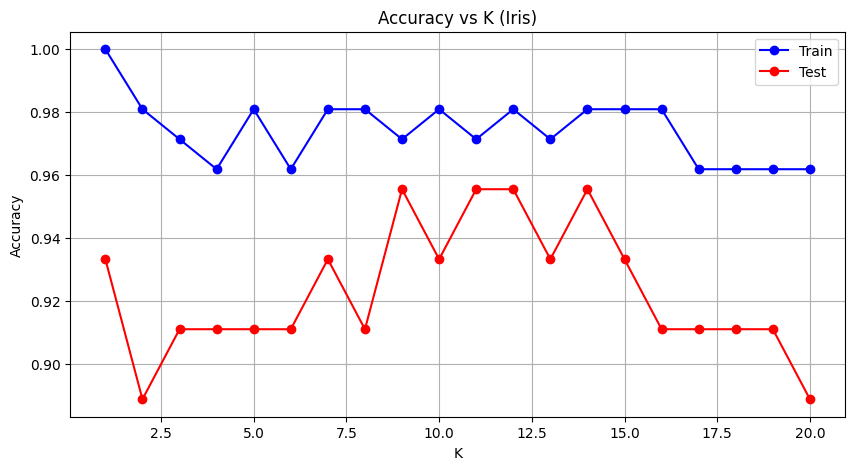

Best K based on test accuracy: 9
Best K from 5-fold CV: 14


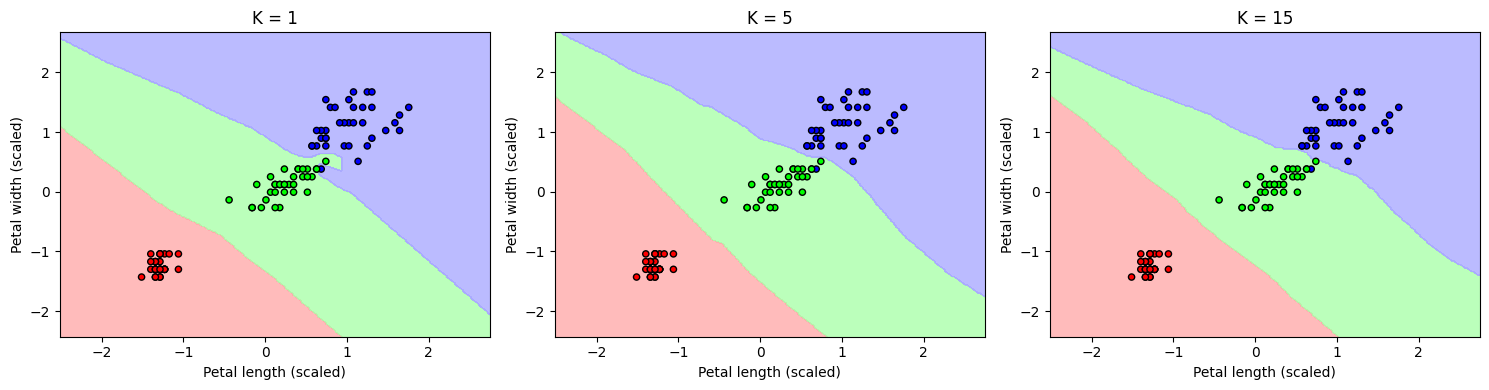


Final test accuracy with K=14: 0.9556

Sample predictions (first 10 test samples):
Actual: virginica  | Predicted: virginica  | Match: True
Actual: versicolor | Predicted: versicolor | Match: True
Actual: virginica  | Predicted: versicolor | Match: False
Actual: versicolor | Predicted: versicolor | Match: True
Actual: virginica  | Predicted: virginica  | Match: True
Actual: virginica  | Predicted: virginica  | Match: True
Actual: versicolor | Predicted: versicolor | Match: True
Actual: versicolor | Predicted: versicolor | Match: True
Actual: setosa     | Predicted: setosa     | Match: True
Actual: virginica  | Predicted: virginica  | Match: True


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# 1. Load data
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Find best K using test accuracy (simple)
k_range = range(1, 21)
train_acc = []
test_acc = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, knn.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

# Plot accuracy vs K
plt.figure(figsize=(10,5))
plt.plot(k_range, train_acc, 'b-o', label='Train')
plt.plot(k_range, test_acc, 'r-o', label='Test')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K (Iris)')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(test_acc)]
print(f"Best K based on test accuracy: {best_k}")

# 4. Cross-validation for robust K selection
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_scores.append(scores.mean())
best_k_cv = k_range[np.argmax(cv_scores)]
print(f"Best K from 5-fold CV: {best_k_cv}")

# 5. Visualize decision boundaries for selected K values (using only 2 features)
# Use petal length and width (features 2 and 3)
X_2d = X[:, [2, 3]]
y_2d = y
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42, stratify=y)
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Create mesh
h = 0.02
x_min, x_max = X_train_2d_scaled[:,0].min()-1, X_train_2d_scaled[:,0].max()+1
y_min, y_max = X_train_2d_scaled[:,1].min()-1, X_train_2d_scaled[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

k_plot = [1, 5, 15]
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(15,4))
for i, k in enumerate(k_plot):
    knn_2d = KNeighborsClassifier(n_neighbors=k)
    knn_2d.fit(X_train_2d_scaled, y_train_2d)
    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1,3,i+1)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X_train_2d_scaled[:,0], X_train_2d_scaled[:,1], c=y_train_2d, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f'K = {k}')
    plt.xlabel('Petal length (scaled)')
    plt.ylabel('Petal width (scaled)')
plt.tight_layout()
plt.show()

# 6. Train final model with best K (from CV, e.g., 5) and evaluate on test set
k_final = best_k_cv  # or choose manually
knn_final = KNeighborsClassifier(n_neighbors=k_final)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)
final_acc = accuracy_score(y_test, y_pred)
print(f"\nFinal test accuracy with K={k_final}: {final_acc:.4f}")

# Show some predictions
print("\nSample predictions (first 10 test samples):")
for i in range(10):
    true = target_names[y_test[i]]
    pred = target_names[y_pred[i]]
    print(f"Actual: {true:10s} | Predicted: {pred:10s} | Match: {true==pred}")

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [7]:
X = np.array([[2, 5], [3, 7], [5, 8], [7, 6], [1, 3], [4, 4]])
y = np.array([0, 0, 1, 1, 0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifier with k=3
knn_sk = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train (actually just storing data)
knn_sk.fit(X_train, y_train)

y_pred = knn_sk.predict(X_test)
print("Predictions:", y_pred)
print("True labels:", y_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Predictions: [1 1]
True labels: [0 0]
Accuracy: 0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris Dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Scaling is MANDATORY for KNN
# Because KNN uses distance, we must ensure all features (cm) are on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split into Training (70%) and Testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Find the best K by checking accuracy for K = 1 to 25
k_values = range(1, 26)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# 5. Predict a specific sample
sample = X_scaled[10].reshape(1, -1) # Taking the 10th flower from the dataset
best_k = k_values[np.argmax(accuracies)]
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

pred = final_model.predict(sample)
print(f"True Species: {iris.target_names[y[10]]}")
print(f"Predicted Species: {iris.target_names[pred[0]]}")
print(f"Best K: {best_k} with {max(accuracies)*100:.2f}% Accuracy")

True Species: setosa
Predicted Species: setosa
Best K: 3 with 100.00% Accuracy


Best K: 20
Test Accuracy: 0.7597

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.78      0.87      0.82       100
    Diabetic       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



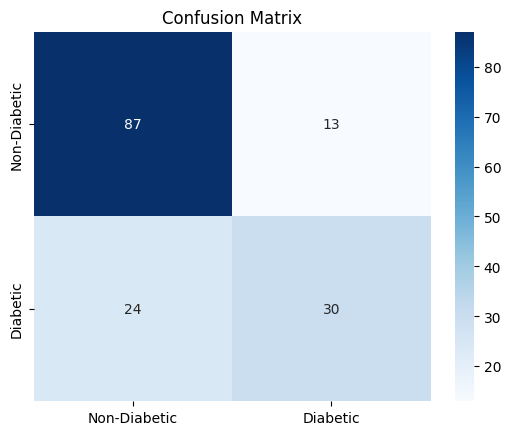

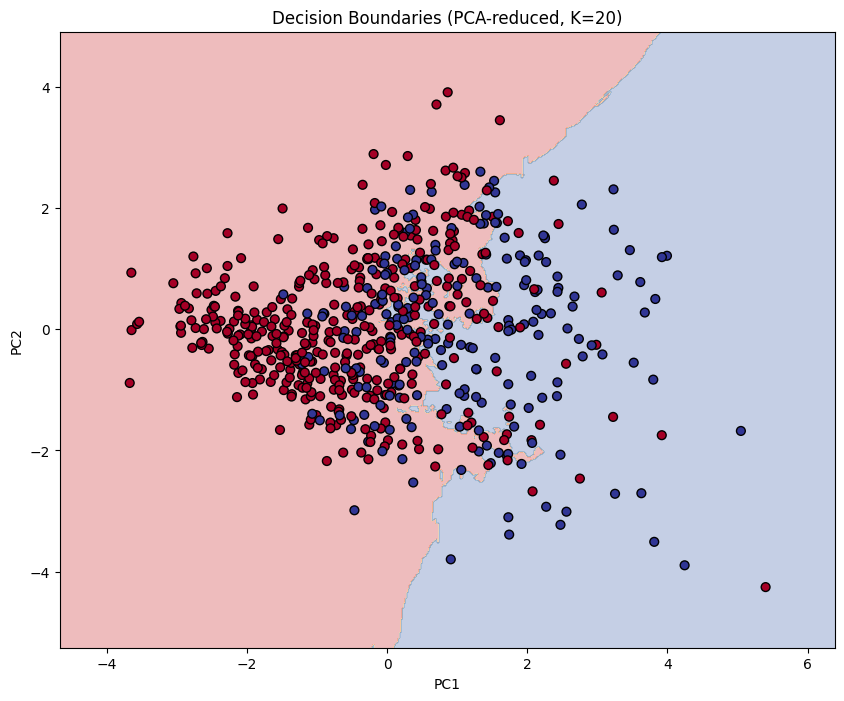


New patient prediction: Diabetic
Probability of diabetic: 0.6000


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Handle missing values (zeros in medically impossible columns)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].median())

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find best K using cross-validation
k_range = range(1, 31)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_range[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

# Train final model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

# Evaluation
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.show()

# PCA Visualization (optional)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train)

x_min, x_max = X_train_pca[:,0].min() - 1, X_train_pca[:,0].max() + 1
y_min, y_max = X_train_pca[:,1].min() - 1, X_train_pca[:,1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=40)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Decision Boundaries (PCA-reduced, K={best_k})')
plt.show()

# Predict a new patient
new_patient = np.array([[2, 120, 70, 20, 85, 32.0, 0.5, 45]])
new_patient_scaled = scaler.transform(new_patient)
pred = knn_final.predict(new_patient_scaled)
prob = knn_final.predict_proba(new_patient_scaled)
print(f"\nNew patient prediction: {'Diabetic' if pred[0]==1 else 'Non-Diabetic'}")
print(f"Probability of diabetic: {prob[0][1]:.4f}")